# Descripció

Anem a practicar i a familiaritzar-nos amb algoritmes de classificació.
## Nivell 1


### Exercici 1

Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).

### Exercici 2

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

### Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

### Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.


In [17]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
import numpy as np
import matplotlib.pyplot as plt



In [18]:
file="DelayedFlights.csv"
df = pd.read_csv(file,low_memory=False,index_col=0)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [19]:
df=df.sample(n=2000)

In [20]:
for item in df ['ArrDelay']:
    if item>0:
        df['Delayed']=True
    else:
        df['Delayed']=False

In [21]:
df.drop(['Year','Month','DayofMonth','DayOfWeek','TailNum','Cancelled', 'CancellationCode', 'Diverted', 'UniqueCarrier', 'Origin', 'Dest','ArrDelay'], axis=1, inplace=True) 
df.dropna(inplace=True) 

In [22]:
X=df #dataset
y=df['Delayed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


In [23]:
#Escalat de les dades
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Precisió arbre classificació  criteri gini:",metrics.accuracy_score(y_test, y_pred))


Precisió arbre classificació  criteri gini: 1.0


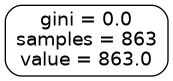

In [25]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from io import StringIO 

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [26]:

# Inicializar nosso classificador
gnb = GaussianNB()

# Treinar nosso classificador
model = gnb.fit(X_train, y_train)

# Fazer previsões
preds = gnb.predict(X_test)

# Avaliar a precisão
print(accuracy_score(y_test, preds))



1.0



## Nivell 2

### Exercici 5

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció


In [28]:
X=df #dataset
y=df['Delayed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
## PCA
pca = decomposition.PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)## train 2d model
model_2d = ensemble.GradientBoostingClassifier()
model_2d.fit(X_train, y_train)
    
## plot classification regions
from matplotlib.colors import ListedColormap
colors = {np.unique(y_test)[0]:"black", np.unique(y_test)[1]:"green"}
X1, X2 = np.meshgrid(np.arange(start=X_test[:,0].min()-1, stop=X_test[:,0].max()+1, step=0.01),
np.arange(start=X_test[:,1].min()-1, stop=X_test[:,1].max()+1, step=0.01))
fig, ax = plt.subplots()
Y = model_2d.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)
ax.contourf(X1, X2, Y, alpha=0.5, cmap=ListedColormap(list(colors.values())))
ax.set(xlim=[X1.min(),X1.max()], ylim=[X2.min(),X2.max()], title="Classification regions")
for i in np.unique(y_test):
    ax.scatter(X_test[y_test==i, 0], X_test[y_test==i, 1], 
               c=colors[i], label="true "+str(i))  
plt.legend()
plt.show()

ValueError: y contains 1 class after sample_weight trimmed classes with zero weights, while a minimum of 2 classes are required.

In [ ]:
## define hyperparameters combinations to try
param_dic = {
'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],      #weighting factor for the corrections by new trees when added to the model
'n_estimators':[100,250,500,750,1000,1250,1500,1750],  #number of trees added to the model
'max_depth':[2,3,4,5,6,7],    #maximum depth of the tree
'min_samples_split':[2,4,6,8,10,20,40,60,100],    #sets the minimum number of samples to split
'min_samples_leaf':[1,3,5,7,9],     #the minimum number of samples to form a leaf
'max_features':[2,3,4,5,6,7],     #square root of features is usually a good starting point
'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]} 

In [ ]:
## random search
random_search = model_selection.RandomizedSearchCV(model, 
       param_distributions=param_dic, n_iter=1000, 
       scoring="accuracy").fit(X_train, y_train)


ValueError: Invalid parameter subsample for estimator GaussianNB(). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)
model = random_search.best_estimator_

## Nivell 3


### Exercici 6

No utilitzis la variable DepDelay a l’hora de fer prediccions